In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#Create a Model Class that inherits as nn.module

class Model(nn.Module):
  #
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()                                       #build a neural network structure
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):                                 #here we moving the structure forward
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [3]:
torch.manual_seed(41)

model = Model()

In [4]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('virginica', 1.0)
my_df['species'] = my_df['species'].replace('versicolor', 2.0)

/tmp/ipython-input-5-2921573905.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('versicolor', 2.0)


In [6]:
X = my_df.drop('species',axis=1)
y=my_df['species']

X = X.values
y=y.values

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [8]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [9]:
# set criterion of model to measure the error of the model
criterion = nn.CrossEntropyLoss()
#choose Adam Optimizer, lr -  learning rate (if the error doesnt go down after a bunch of iterations decrease learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [10]:
# Train the model
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred,y_train)  #comparing the prediction vs orginal data to determine the loss of our model

  losses.append(loss.detach().numpy()) #traking losses .ddetach() is used to numpy array

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1397022008895874
Epoch: 10 and loss: 1.0544100999832153
Epoch: 20 and loss: 0.9166715741157532
Epoch: 30 and loss: 0.6260551810264587
Epoch: 40 and loss: 0.3987550735473633
Epoch: 50 and loss: 0.24901507794857025
Epoch: 60 and loss: 0.13584764301776886
Epoch: 70 and loss: 0.07556892931461334
Epoch: 80 and loss: 0.05038198083639145
Epoch: 90 and loss: 0.038889769464731216


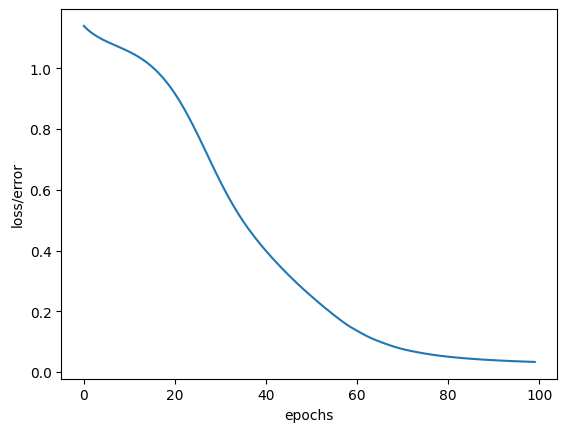

In [11]:
# Graph

plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('epochs')

plt.show()

In [12]:
correct = 0
with torch.no_grad(): #stops back propagation
  for i, data in enumerate(X_test):
    y_eval = model.forward(data)

    print(f'{i+1} {y_eval} \t {y_test[i]} ')

    if y_eval.argmax().item() == y_test[i]:
          correct+=1

print(f'{correct}')


#   loss = criterion(y_eval,y_test)
# loss

1 tensor([-6.9815,  5.7408,  2.8455]) 	 1 
2 tensor([-10.1079,   9.1258,   1.3065]) 	 1 
3 tensor([-10.9584,   9.6312,   2.1591]) 	 1 
4 tensor([-2.8685,  1.0380,  5.6331]) 	 2 
5 tensor([-8.7846,  7.4753,  2.6232]) 	 1 
6 tensor([-0.5798, -1.5149,  7.0015]) 	 2 
7 tensor([-6.4517,  4.9981,  3.6209]) 	 1 
8 tensor([-2.5549,  0.6965,  5.7920]) 	 2 
9 tensor([-7.5313,  6.1537,  3.1311]) 	 1 
10 tensor([-10.7096,   9.6681,   1.3449]) 	 1 
11 tensor([-5.9053,  4.4576,  3.7346]) 	 1 
12 tensor([ 13.1833, -14.0755,   5.5305]) 	 0 
13 tensor([ 12.0059, -12.7652,   4.9037]) 	 0 
14 tensor([ 1.2265, -3.0406,  6.3975]) 	 2 
15 tensor([ 11.4834, -12.5821,   5.9413]) 	 0 
16 tensor([-5.4799,  3.9468,  4.1003]) 	 1 
17 tensor([ 11.9423, -12.8441,   5.3712]) 	 0 
18 tensor([-6.5523,  5.2595,  3.1084]) 	 2 
19 tensor([ 12.6839, -13.5421,   5.3429]) 	 0 
20 tensor([ 10.5711, -11.5527,   5.4033]) 	 0 
21 tensor([ 0.4430, -2.3670,  6.6304]) 	 2 
22 tensor([-9.8637,  8.6577,  2.0489]) 	 1 
23 tensor([ 11

In [14]:
#save and load
torch.save(model.state_dict(),'iris_model.pt')
